## Algorithm EM sur des données bi-dimensionnelles

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
from sklearn.datasets.samples_generator import make_blobs

Génération du dataset:
   - Nuage de points bi-dimensionnel
   - X[:,0] coordonées x
   - X[:,1] coordonées y

In [3]:
# nombre de clusters
nb_clusters = 2
X, y_true = make_blobs(n_samples=1000, centers=nb_clusters,
                           cluster_std=0.7, random_state=0)

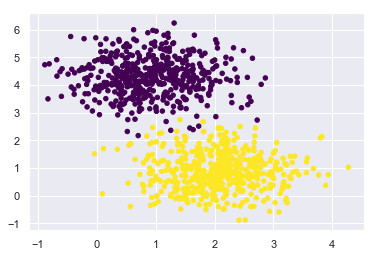

In [4]:
plt.scatter(X[:, 0], X[:, 1], s=20, c=y_true, cmap='viridis');
plt.savefig("")
plt.show()

Coder une fonction permettant de calculer la densité de probabilité de X, étant donnée:
    - Sa moyenne Mu
    - Sa matrice de variance-covariance S2

In [ ]:
def normal_ndim(Xi, Mu, S2):
    
    #ex = np.exp( -0.5 * (X - Mu)**2 / S )
    Xic  = Xi - Mu
    S2_1 = np.linalg.inv(S2)
    ex = np.exp( -0.5 * Xic.T.dot(S2_1).dot(Xic) )
    det = abs(np.linalg.det(S2))
    n   = Xi.shape[0]
    return ex / np.sqrt( ((2*np.pi)**n) * det )

Coder une fonction permettant d'initialiser les poids, moyennes de façon aléatoire (ou de façon plus intelligente), et affecter chaque points à un cluster de façon aléatoire (variable Z).

In [ ]:
def init(X, nb_clusters):
    # WI_0 *N(Mu_0, S2_0) + WI_1 * N(Mu_1, S2_1)
    # votre code: 

    return (WI, Mu, S2, Z, QI)

Calculer la vraisemblance de l'échantillon sachant les différents paramètres estimés:
        - QI: la probabilité de Z sachant X et les autres paramètres
        - Z : Indice du cluster (le plus probable)
        - Mu: Les moyennes
        - S2: Les matrices de variance-covariances

In [ ]:
def log_my_ll(X, WI, Mu, S2, Z, QI):
    # votre code

L'étape E de EM, qui fait appel la fonction précédente:

In [ ]:
def e_step(X, WI, Mu, S2, Z, QI):
    return log_my_ll(X, WI,  Mu, S2, Z, QI)

L'étape M de EM, qui estimes calcul les estimatuers par le maximum de vraisemblance:

In [ ]:
def m_step(X, WI, Mu, S2, Z, QI):
    # votre code

L'algorithme EM, avec un nombre d'itération en entrée (it), qui fait appel à la fonction e_step et m_step.

In [ ]:
def EM(X, WI, Mu, S2, Z, QI, it):
    # votre code
    for i in range(it):pass
        #e_step
        #m_step

In [ ]:
# initiation (à décommenter)
#(WI, Mu, S2, Z, QI) = init(X, nb_clusters)

In [ ]:
# EM
#EM(X, WI, Mu, S2, Z, QI, 20)

In [ ]:

plt.scatter(X[:, 0], X[:, 1], c=Z, s=20, cmap='viridis')

# Affichage illustratif
for i in range(nb_clusters):
    plt.scatter(Mu[i, 0], Mu[i, 1], c='red', s=200, alpha=0.5);
    plt.scatter(Mu[i, 0], Mu[i, 1], c='red', s=2000, alpha=0.25);
    plt.scatter(Mu[i, 0], Mu[i, 1], c='red', s=4000, alpha=0.10);
plt.show()
WI

In [ ]:
# Afficage avec la loi normal bi-dimentionnel (ne pas modifier)

In [ ]:
m = Mu[0]
cov = S2[0]
cov_inv = np.linalg.inv(cov)  # inverse of covariance matrix
cov_det = np.linalg.det(cov)  # determinant of covariance matrix# Plotting
x = np.linspace(m[0]-4*cov[0,0], m[0]+4*cov[0,0])
y = np.linspace(m[1]-4*cov[1,1], m[1]+4*cov[1,1])
X0, Y0 = np.meshgrid(x,y)
coe = 1.0 / ((2 * np.pi)**2 * cov_det)**0.5
Z0 = coe * np.e ** (-0.5 * (cov_inv[0,0]*(X0-m[0])**2 + 
                            (cov_inv[0,1] + cov_inv[1,0])*(X0-m[0])*(Y0-m[1]) + 
                            cov_inv[1,1]*(Y0-m[1])**2))

In [ ]:
m   = Mu[1]
cov = S2[1]
E   = 7
cov_inv = np.linalg.inv(cov)  # inverse of covariance matrix
cov_det = np.linalg.det(cov)  # determinant of covariance matrix# Plotting
x       = np.linspace(m[0]-E*cov[0,0], m[0]+E*cov[0,0], 100)
y       = np.linspace(m[1]-E*cov[1,1], m[1]+E*cov[1,1], 100)
X1, Y1  = np.meshgrid(x,y)
coe     = 1.0 / ((2 * np.pi)**2 * cov_det)**0.5
Z1      = coe * np.e ** (-0.5 * (cov_inv[0,0]*(X1-m[0])**2 + 
                                     (cov_inv[0,1] + cov_inv[1,0])*(X1-m[0])*(Y1-m[1]) + 
                                     cov_inv[1,1]*(Y1-m[1])**2))

In [ ]:
plt.figure()
plt.contour(X0,Y0,Z0)
plt.contour(X1,Y1,Z1)
plt.scatter(X[:, 0], X[:, 1], c=Z, s=20, cmap='viridis')
plt.show()

Vous pouvez utiliser la fonction animate pour afficher les étapes de convergence de EM à chaque itération.
    - Pour cela, il faut sauvegarder l'état (les paramètres) à chaque itération

Retester votre code avec différents nombre de clusters.